In [1]:
import tensorflow as tf
from skimage import data
import os
import numpy as np

`tf.constant()` and `tf.multiply()`

In [2]:
# initialize 2 constant
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


The result above is an abstract tensor in the computation graph, not the multiplication result, yet!
Hence, __TensorFlow__ has a lazy evaluation.

If we need to do the calculation, multiplication, we need to run them in the interactive __Session__ like below.

In [3]:
# initialize the Session
sess = tf.Session()

# print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]


Beside the above method, we can initialize a _Session_ using `with` statement in Python and then close it automatically. Just like common `with` statement

In [4]:
# initialize session and run `result`
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

[ 5 12 21 32]


## Belgian Traffic Signs

In [5]:
!ls ./belgian-traffics/

Testing  Training


In [6]:
# UDF `load_data()`
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

Loading images and labels . . .

In [7]:
image_path = './belgian-traffics/'
training_directory = os.path.join(image_path, 'Training')
testing_directory = os.path.join(image_path, 'Testing')

data_image, data_label = load_data(training_directory)

In [8]:
print('type of data_image: {}'.format(type(data_image)))
print('type of data_label: {}'.format(type(data_label)))
print('\n converting to ndarray... \n')
data_image, data_label = np.array(data_image), np.array(data_label)
print('type of data_image: {}'.format(type(data_image)))
print('type of data_label: {}'.format(type(data_label)))

type of data_image: <class 'list'>
type of data_label: <class 'list'>

 converting to ndarray... 

type of data_image: <class 'numpy.ndarray'>
type of data_label: <class 'numpy.ndarray'>


In [9]:
print('data_image shape: {}'.format(data_image.shape))
print('data_label shape: {}'.format(data_label.shape))
print('')
print(data_image[0].shape)
print(data_label[0])
print('data_image[0]:')
print(data_image[0][0])

data_image shape: (4575,)
data_label shape: (4575,)

(144, 141, 3)
31
data_image[0]:
[[ 47  52  59]
 [ 35  64  72]
 [ 53 104 112]
 [102 151 157]
 [118 159 163]
 [120 156 157]
 [112 143 141]
 [113 144 141]
 [114 146 142]
 [115 149 144]
 [116 150 146]
 [112 145 141]
 [108 139 135]
 [108 137 134]
 [109 137 135]
 [110 141 139]
 [111 144 144]
 [111 147 148]
 [112 147 148]
 [120 147 144]
 [121 137 130]
 [ 89  95  82]
 [ 54  52  36]
 [ 44  41  27]
 [ 40  39  30]
 [ 36  38  34]
 [ 35  39  39]
 [ 33  37  39]
 [ 32  36  38]
 [ 33  37  39]
 [ 35  39  40]
 [ 37  41  41]
 [ 39  44  42]
 [ 42  47  43]
 [ 44  49  43]
 [ 46  51  45]
 [ 47  53  47]
 [ 48  54  48]
 [ 48  54  48]
 [ 48  54  49]
 [ 48  55  50]
 [ 49  55  51]
 [ 50  56  51]
 [ 51  58  51]
 [ 51  59  51]
 [ 52  61  50]
 [ 53  61  50]
 [ 53  60  50]
 [ 53  58  51]
 [ 52  56  50]
 [ 51  54  49]
 [ 50  52  46]
 [ 49  52  43]
 [ 46  51  39]
 [ 46  52  39]
 [ 52  56  45]
 [ 57  59  52]
 [ 55  55  54]
 [ 51  55  58]
 [ 30  46  55]
 [ 39  71  86]


Distribution of the traffic signs:

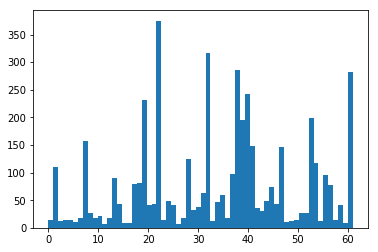

In [10]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(data_label, 62)

# Show the plot
plt.show()

Visualizing the image:

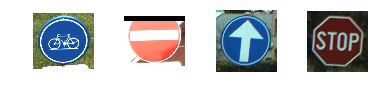

In [11]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(data_image[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

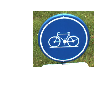

shape: (236, 256, 3), min: 0, max: 255


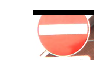

shape: (133, 164, 3), min: 0, max: 255


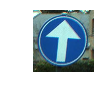

shape: (122, 121, 3), min: 0, max: 255


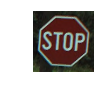

shape: (123, 123, 3), min: 0, max: 215


In [12]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(data_image[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(data_image[traffic_signs[i]].shape, 
                                                  data_image[traffic_signs[i]].min(), 
                                                  data_image[traffic_signs[i]].max()))

Plot all image labels

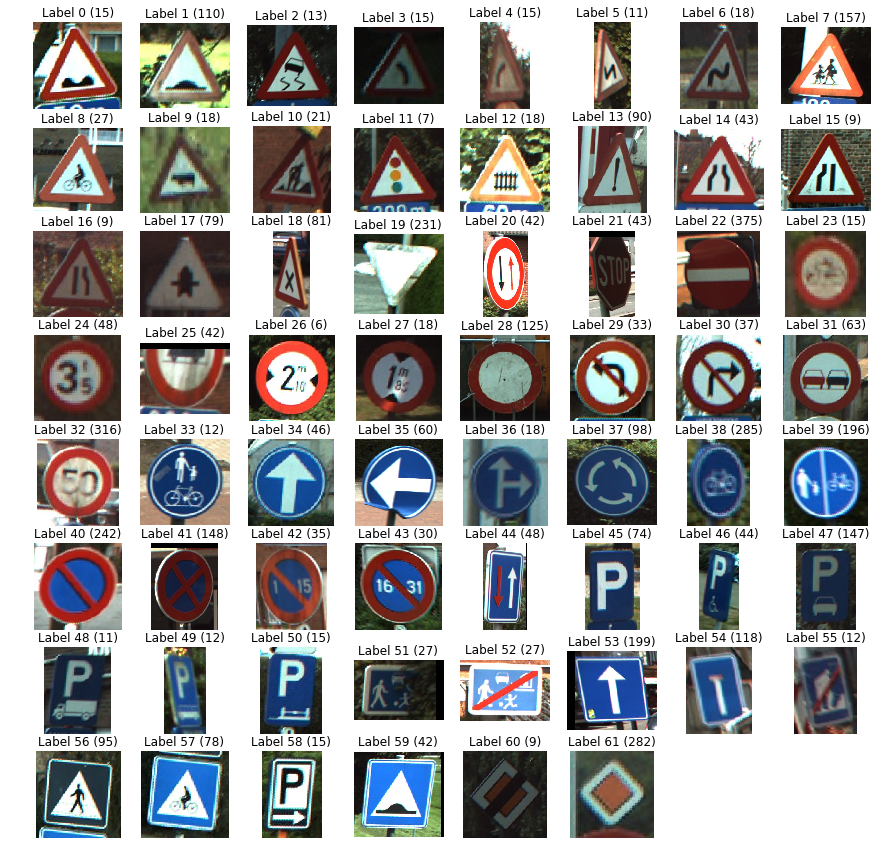

In [13]:
# Get the unique labels 
unique_labels = set(data_label)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = data_image[np.where(data_label == label)[0][0]]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot
    _, counts = np.unique(data_label, return_counts=True)
    plt.title("Label {0} ({1})".format(label, counts[label]))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()